In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv("../data/scores_synth.csv")
print(data.shape)
data

(1000, 3)


,income,score,internet_connection
0,69.454075,635.305372,1
1,47.632800,743.301322,1
2,22.905094,673.037833,1
3,4.465032,442.894112,0
4,19.360381,627.178633,1
...,...,...,...
995,8.801915,464.993872,0
996,15.317348,641.288260,1
997,25.411924,641.858088,1
998,4.898013,447.408180,0


In [16]:
data.describe()

,income,score,internet_connection
count,1000.000000,1000.000000,1000.000000
mean,25.132120,609.472997,0.691000
std,17.217098,82.097653,0.462312
min,0.893344,294.585973,0.000000
25%,13.581826,553.830647,0.000000
50%,19.073273,612.714370,1.000000
75%,34.970305,668.431175,1.000000
max,77.006947,845.859379,1.000000


In [17]:
data.corr()

,income,score,internet_connection
income,1.000000,0.655725,0.229461
score,0.655725,1.000000,0.286389
internet_connection,0.229461,0.286389,1.000000


Text(0.5, 0, 'income (in 1k euros)')

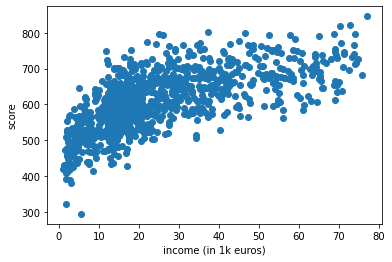

In [18]:
plt.scatter(data['income'], data['score'])
plt.ylabel('score')
plt.xlabel('income (in 1k euros)')

Let's draw a linear line across this scatter plot. 

In other words,
$$ y=f(x)=\alpha+\beta*x$$
$$score = f(income)=\alpha+\beta*income$$

In [19]:
Y = data['score']
X = data[['income']]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['income']], data['score'], test_size=0.4, shuffle=True)

In [21]:
pd.concat([X_train,y_train],axis=1)

,income,score
644,21.247744,506.499661
406,11.820999,657.277533
280,5.355991,594.668350
465,14.342606,574.897660
569,23.161255,551.034469
...,...,...
273,25.880436,616.786834
96,16.927340,674.065926
645,1.267872,430.950619
963,27.956045,605.790326


In [22]:
pd.concat([X_test,y_test],axis=1)

,income,score
272,17.638121,665.883017
528,14.838451,596.018195
255,29.156847,584.900135
547,11.066916,469.291647
906,11.606154,571.459684
...,...,...
970,12.176951,615.117002
623,2.326452,494.128737
112,48.958510,732.355906
865,36.603363,645.388620


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='score'>

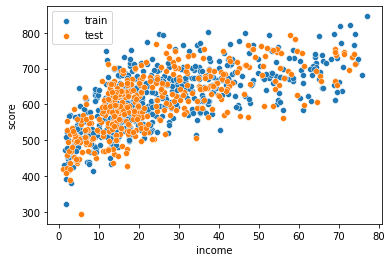

In [27]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max())
sns.scatterplot(X_train['income'], y_train, label='train')
sns.scatterplot(X_test['income'], y_test, label='test')

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
print('a is',lr.intercept_)
print('b is', lr.coef_)

a is 535.9342916577307
b is [2.98666365]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


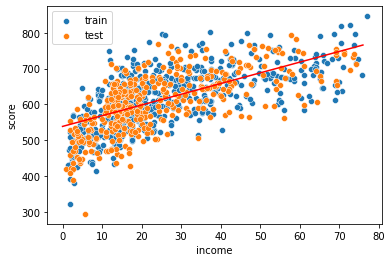

In [29]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max())
y_hat = lr.intercept_ + lr.coef_[0]*x_range
sns.scatterplot(X_train['income'], y_train, label='train')
sns.scatterplot(X_test['income'], y_test, label='test')
plt.plot(y_hat, color='r')
plt.legend()

## Inference

One of the reasons why **linear regressions** are very popular despite its restrictive assumption on the functional form is due to their simplcity and **interpretability**. We will see how to treat non-linear relationships with a linear model in the next class.

 
Going back to the formulation: 
$$ y=f(x)=a+b*x$$
$$score = f(income)=a+b*income$$
$$score = f(income)=a*1+b*income$$



How do we interpret this function?

#### Coefficient
It's actually very simple... The impact of a variable in a linear model is constant across different values of that variable. Hence, we can state that for every 1.000 euro increase on students income we get on average (expectation) an increase of 4 points in score. Look again... do you see any issue with that 'functionality' of linear regression?

## Mean Squared Error

In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lr.predict(X_test))

3913.882328937369

In [35]:
lr.predict(X_test)
losses = {}
losses['Linear'] = mean_squared_error(y_test, lr.predict(X_test))
print(losses)

{'Linear': 3237.5684796828277}


## Polynomials

$$y = a + \beta_1 \times\text{income} + \beta_2 \times{income}^2 + \epsilon$$

In [32]:
data['income2'] = data['income']**2

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data[['income','income2']], data['score'], test_size=0.4, shuffle=True)

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


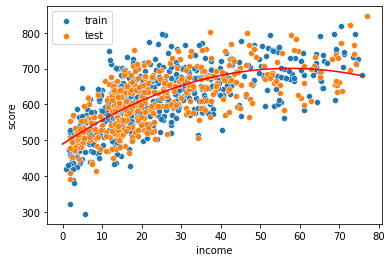

In [37]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max())
y_hat = lr.intercept_ + lr.coef_[0]*x_range + lr.coef_[1]*(x_range**2)
sns.scatterplot(X_train['income'], y_train, label='train')
sns.scatterplot(X_test['income'], y_test, label='test')
plt.plot(y_hat, color='r')
plt.legend()

In [36]:
lr.predict(X_test)
losses['Linear, polynomial2'] = mean_squared_error(y_test, lr.predict(X_test))
for key, value in losses.items():
    print(key, ' : ', value)

Linear  :  3237.5684796828277
Linear: polynomial2  :  3237.5684796828277


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


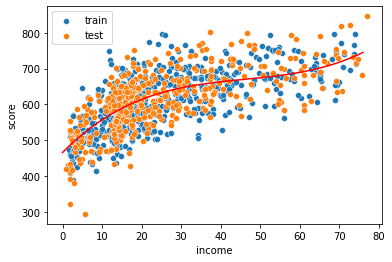

In [38]:
data['income3'] = data['income']**3
X_train, X_test, y_train, y_test = train_test_split(data[['income','income2','income3']], data['score'], test_size=0.4, shuffle=True)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
    
y_hat = lr.intercept_ + lr.coef_[0]*x_range + lr.coef_[1]*(x_range**2) + lr.coef_[2]*(x_range**3)
sns.scatterplot(X_train['income'], y_train, label='train')
sns.scatterplot(X_test['income'], y_test, label='test')
plt.plot(y_hat, color='r')
plt.legend()

In [39]:
losses['Linear: polynomial3'] = mean_squared_error(y_test, lr.predict(X_test))
for key, value in losses.items():
    print(key, ' : ', value)

Linear  :  3237.5684796828277
Linear: polynomial2  :  3237.5684796828277
Linear: polynomial3  :  3457.9352023243964
